In [ ]:
import xlwt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
!gdown 1xsbPZZDx92EGzyUs3FkuREd1Q19ihqlv

Downloading...
From: https://drive.google.com/uc?id=1xsbPZZDx92EGzyUs3FkuREd1Q19ihqlv
To: /content/autos_mpg.csv
100% 18.1k/18.1k [00:00<00:00, 23.9MB/s]


#Import Data

In [ ]:
df = pd.read_csv('autos_mpg.csv')

In [ ]:
# cek head dari data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#EDA & Preprocessing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# mengubah ? menjadi null
df.replace('?', np.nan, inplace = True)

In [ ]:
# mengubah tipe data seluruh atribut menjadi float kecuali kolom car_name
df.loc[:, df.columns != 'car_name'] = df.loc[:, df.columns != 'car_name'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    float64
 7   origin        398 non-null    float64
 8   car_name      398 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.1+ KB


In [ ]:
# cek missing values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [ ]:
# Isi missing value pada semua atribut menggunakan mean atribut tersebut
for col in df.columns[:-1]:
  df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
# cek kembali missing values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# drop kolom car_name
df.drop(['car_name'], axis=1, inplace=True)

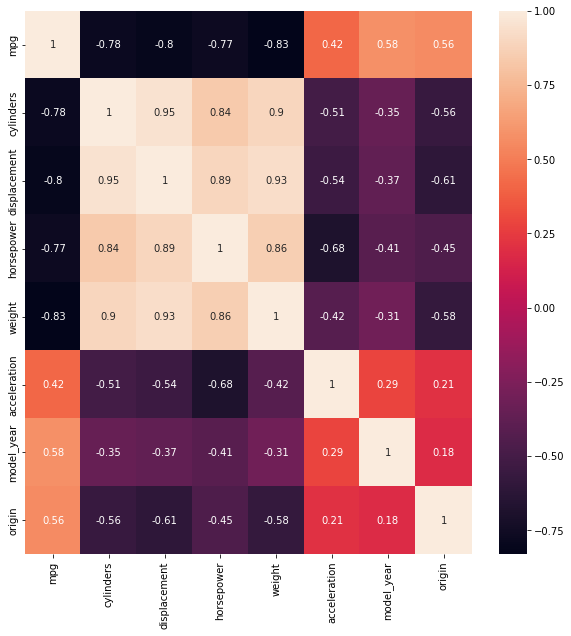

In [ ]:
# Menampilkan heatmap korelasi antar fitur
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

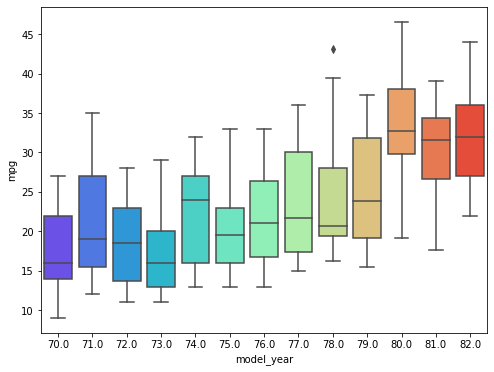

In [ ]:
# Menampilkan boxplot model_year - mpg
plt.figure(figsize=(8, 6))
sns.boxplot(x='model_year', y='mpg', data=df,palette = "rainbow")
plt.show()

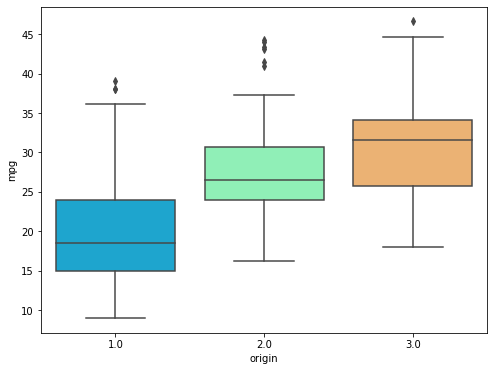

In [ ]:
# Menampilkan boxplot origin - mpg
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=df,palette = "rainbow")
plt.show()

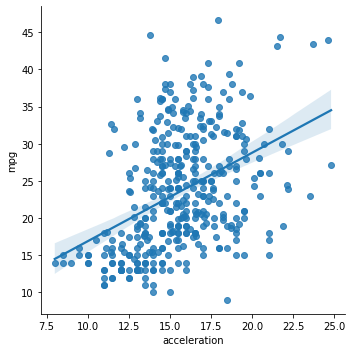

In [ ]:
# Menampilkan linear model plot acceleration vs mpg
sns.lmplot(x='acceleration', y='mpg', data=df)

##Train Test Split

In [ ]:
X = df[[col for col in df.columns if col != 'mpg']]
y = df['mpg']

In [ ]:
# memecah data menjadi train dan test dataset dengan rasio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print('Banyaknya data train:', X_train.shape[0])
print('Banyaknya data test:', X_test.shape[0])

Banyaknya data train: 318
Banyaknya data test: 80


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# membuat objek MinMaxScaler yang bernama scaler
scaler = MinMaxScaler()
# fit scaler ke features, transform features ke versi scaled
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

#Build Model & Tune Hyperparameters

In [ ]:
# Model AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
model = AdaBoostRegressor()
params = {'n_estimators':[250, 500, 1000, 2000], 'learning_rate':[0.0001, 0.001, 0.01, 0.1],
          'random_state':[101]}
k_fold_cv = KFold(n_splits=8, shuffle=True, random_state=101)
grid_search_cv =  GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error',
                               cv=k_fold_cv)
grid_search_cv.fit(X_train_sc, y_train)
print('Best hyperparameter:', grid_search_cv.best_params_)
print('Best score (in negative MSE):', grid_search_cv.best_score_)

Best hyperparameter: {'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 101}
Best score (in negative MSE): -9.89423450203694


In [ ]:
# Model GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor()
grid_search_cv_2 =  GridSearchCV(estimator=model2, param_grid=params, scoring='neg_mean_squared_error',
                               cv=k_fold_cv)
grid_search_cv_2.fit(X_train_sc, y_train)
print('Best hyperparameter:', grid_search_cv_2.best_params_)
print('Best score (in negative MSE):', grid_search_cv_2.best_score_)

Best hyperparameter: {'learning_rate': 0.01, 'n_estimators': 500, 'random_state': 101}
Best score (in negative MSE): -8.777675174767712


In [ ]:
# Model XGBRegressor
from xgboost import XGBRegressor
model3 = XGBRegressor(objective ='reg:squarederror')
grid_search_cv_3 =  GridSearchCV(estimator=model3, param_grid=params, scoring='neg_mean_squared_error',
                               cv=k_fold_cv)
grid_search_cv_3.fit(X_train_sc, y_train)
print('Best hyperparameter:', grid_search_cv_3.best_params_)
print('Best score (in negative MSE):', grid_search_cv_3.best_score_)

Best hyperparameter: {'learning_rate': 0.01, 'n_estimators': 500, 'random_state': 101}
Best score (in negative MSE): -8.68607884296298


##Train Model dengan Best Hyperparameter

In [ ]:
# Model AdaBoostRegressor
best_model = AdaBoostRegressor(learning_rate=0.1, n_estimators=500, random_state=101)
best_model.fit(X_train_sc, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=500, random_state=101)

In [ ]:
# Model GradientBoostingRegressor
best_model2 = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=101)
best_model2.fit(X_train_sc, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500,
                          random_state=101)

In [ ]:
# Model XGBRegressor
best_model3 = XGBRegressor(objective ='reg:squarederror', learning_rate=0.01, n_estimators=500, random_state=101)
best_model3.fit(X_train_sc, y_train)

XGBRegressor(learning_rate=0.01, n_estimators=500, objective='reg:squarederror',
             random_state=101)

#Testing, Model Evaluation

In [ ]:
# Model AdaBoostRegressor
from sklearn.metrics import mean_squared_error
y_pred = best_model.predict(X_test_sc)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'RMSE: {np.sqrt(mse):.2f}')

MSE: 7.40
RMSE: 2.72


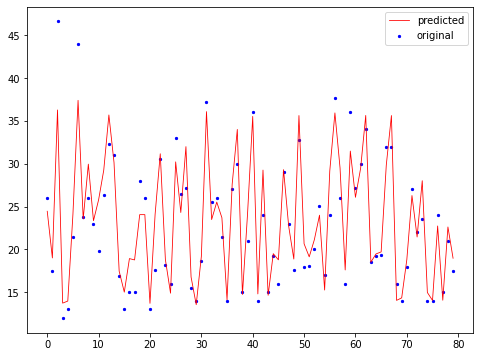

In [ ]:
plt.figure(figsize=(8, 6))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
# Model GradientBoostingRegressor
y_pred2 = best_model2.predict(X_test_sc)
mse2 = mean_squared_error(y_test, y_pred2)
print(f'MSE: {mse2:.2f}')
print(f'RMSE: {np.sqrt(mse2):.2f}')

MSE: 6.22
RMSE: 2.49


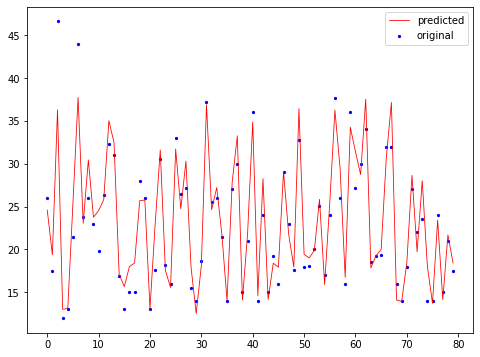

In [ ]:
plt.figure(figsize=(8, 6))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred2, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
# Model XGBRegressor
y_pred3 = best_model3.predict(X_test_sc)
mse3 = mean_squared_error(y_test, y_pred3)
print(f'MSE: {mse3:.2f}')
print(f'RMSE: {np.sqrt(mse3):.2f}')

MSE: 5.49
RMSE: 2.34


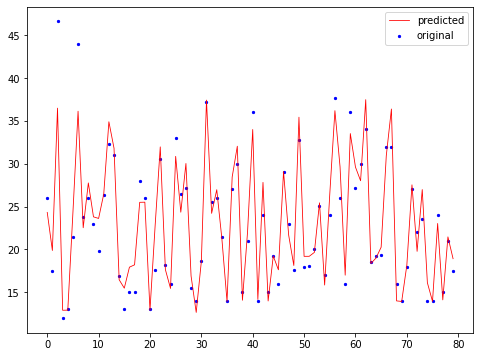

In [ ]:
plt.figure(figsize=(8, 6))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred3, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#Save Testing Output to File

In [ ]:
workbook = xlwt.Workbook()
worksheet = workbook.add_sheet('result')
col = 0
for name in X_test.columns:
  worksheet.write(0, col, name)
  col += 1
worksheet.write(0, col, 'Original mpg')
col += 1
worksheet.write(0, col, 'Predicted mpg')
row = 1
for i in range(len(X_test)):
  col = 0
  for name in X_test.columns:
    worksheet.write(row, col, float(X_test.iloc[i][name]))
    col += 1
  worksheet.write(row, col, float(y_test.iloc[i]))
  col += 1
  worksheet.write(row, col, float(y_pred3[i]))
  row = row + 1
workbook.save('result.xls')